In [1]:
# running script to load GROCERY DB tables 
%run main.py

Connected to GROCERY database.
All tables loaded from GROCERY DB.
Connection to GROCERY DB is now closed.


C:\Users\chanks\workspace\grocery-db\main.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\chanks\workspace\grocery-db\main.py:89: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  table = pd.read_sql(query, connection, parse_dates = ['date'], coerce_float= True)
C:\Users\chanks\workspace\grocery-db\main.py:89: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connectio

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 


In [3]:
# tables of interest for analysis: 

stores, items, trips = grocery_tables['store'], grocery_tables['items'], grocery_tables['trips']

In [4]:
stores.head()

,id,name,address
0,1,Fred Meyer,3805 SE Hawthorne Blvd
1,2,Winco,7979 SE Powell Blvd
2,3,US FOODS CHEFSTORE,731 SE Stephens St
3,4,Trader Joes,4121 NE Halsey St
4,5,Whole Foods,2825 E Burnside St


In [5]:
#joining stores with trips to get named
named_trips = pd.merge(stores, trips, left_on = 'id', right_on = 'store_id', how = 'right')

In [6]:
named_trips

,id_x,name,address,id_y,store_id,date,total_cost
0,1,Fred Meyer,3805 SE Hawthorne Blvd,1,1,2023-09-07,18.65
1,2,Winco,7979 SE Powell Blvd,2,2,2023-09-11,51.75
2,3,US FOODS CHEFSTORE,731 SE Stephens St,3,3,2023-09-12,35.36
3,4,Trader Joes,4121 NE Halsey St,4,4,2023-09-17,57.56
4,2,Winco,7979 SE Powell Blvd,5,2,2023-09-19,77.13
5,5,Whole Foods,2825 E Burnside St,6,5,2023-09-22,22.45
6,2,Winco,7979 SE Powell Blvd,7,2,2023-09-27,79.44
7,6,Target,3031 SE Powell Blvd,8,6,2023-10-02,44.97
8,2,Winco,7979 SE Powell Blvd,9,2,2023-10-07,70.15
9,1,Fred Meyer,3805 SE Hawthorne Blvd,10,1,2023-10-13,15.47


In [7]:
#getting trip count per store: 
trip_count = named_trips.groupby('name').size().reset_index(name = 'count')

trip_count_sorted = trip_count.sort_values(by = 'count', ascending = False)

Text(0.5, 1.0, 'Grocery Frequency, September 2023 - February 2024')

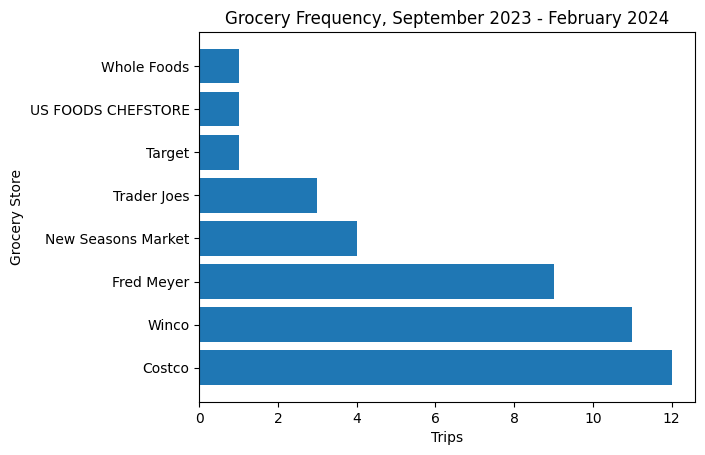

In [8]:
#next step is to visualize this summary table: 

plt.barh(trip_count_sorted['name'],trip_count_sorted['count'])

plt.xlabel('Trips')
plt.ylabel('Grocery Store')
plt.title('Grocery Frequency, September 2023 - February 2024')
